<a href="https://colab.research.google.com/github/SabastianGu/ML_prediction_analysis_practice/blob/main/Tf_ANN_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://lazyprogrammer.me/course_files/exercises/ecoli.csv

--2024-09-09 10:20:21--  https://lazyprogrammer.me/course_files/exercises/ecoli.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19487 (19K) [text/csv]
Saving to: ‘ecoli.csv’

ecoli.csv           100%[===================>]  19.03K  --.-KB/s    in 0s      

2024-09-09 10:20:22 (86.2 MB/s) - ‘ecoli.csv’ saved [19487/19487]



In [2]:
import pandas as pd
import seaborn as sns

data = pd.read_csv('./ecoli.csv', header = None, sep = "\s+")
col_names = ["squence_name","mcg","gvh","lip","chg","aac","alm1","alm2","site"]
data.columns = col_names
data.head()

,squence_name,mcg,gvh,lip,chg,aac,alm1,alm2,site
0,AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp


In [3]:
data.loc[:, data.dtypes == 'object'].columns.to_list()

['squence_name', 'site']

In [4]:
#After analyzing length and amount of values per each column - decided that these ones have almost zero value for predictions, becuase of lack of data
df = data.drop(['squence_name', 'lip', 'chg'], axis = 1)

value_count = df['site'].value_counts()
to_remove = value_count[value_count < 10].index
df = df[~df['site'].isin(to_remove)]

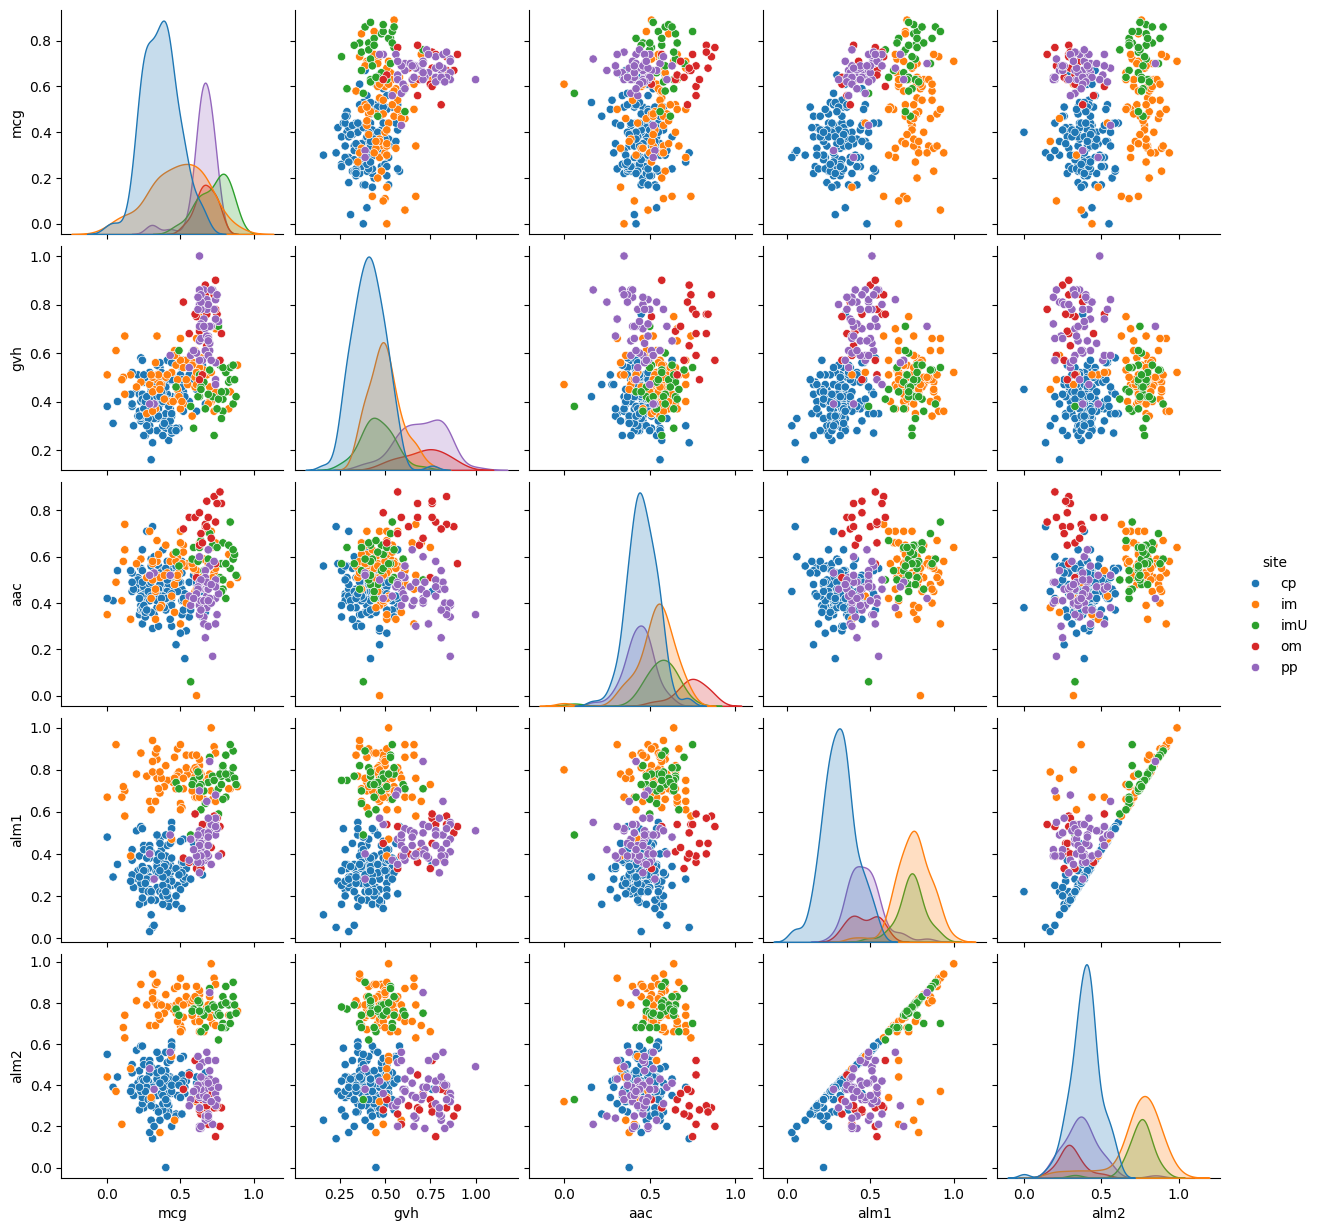

In [5]:
sns.pairplot(df[['mcg', 'gvh', 'aac', 'alm1', 'alm2', 'site']], hue = 'site')

In [29]:
# I pass creating x_valid, y_valid, because i anyway have not much data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, Input, BatchNormalization
from tensorflow.keras.models import Model

x = df.drop('site', axis = 1)
y = df['site']


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
N, D = X_train.shape

lab_encode = LabelEncoder()
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

trans_y_train = lab_encode.fit_transform(y_train)
trans_y_test = lab_encode.fit_transform(y_test)

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape = (D,)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(units = D, activation = 'softmax')
])
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])


In [33]:
r = model.fit(scaled_X_train, trans_y_train, validation_data = (scaled_X_test, trans_y_test), verbose = 1, epochs = 50)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9482 - loss: 0.1422 - val_accuracy: 0.8687 - val_loss: 0.6838
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9025 - loss: 0.1717 - val_accuracy: 0.8182 - val_loss: 0.6830
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9072 - loss: 0.1735 - val_accuracy: 0.8788 - val_loss: 0.6671
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9289 - loss: 0.1642 - val_accuracy: 0.8586 - val_loss: 0.6861
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9238 - loss: 0.1738 - val_accuracy: 0.8586 - val_loss: 0.7564
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9136 - loss: 0.1938 - val_accuracy: 0.8788 - val_loss: 0.7449
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9372 - loss: 0.1482 - val_accuracy: 0.8687 - val_loss: 0.7124
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9217 - loss: 0.1755 - val_accuracy: 0.8687 - val_loss: 0.6618


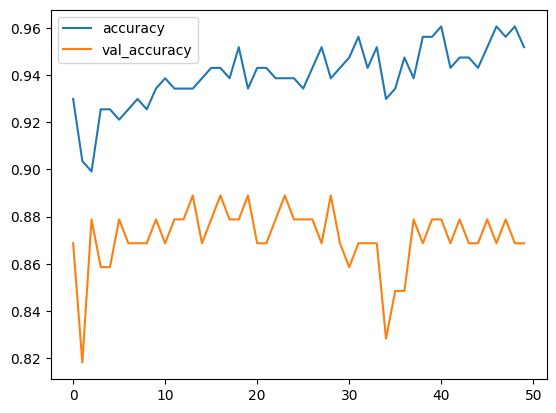

In [37]:
import matplotlib.pyplot as plt

plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

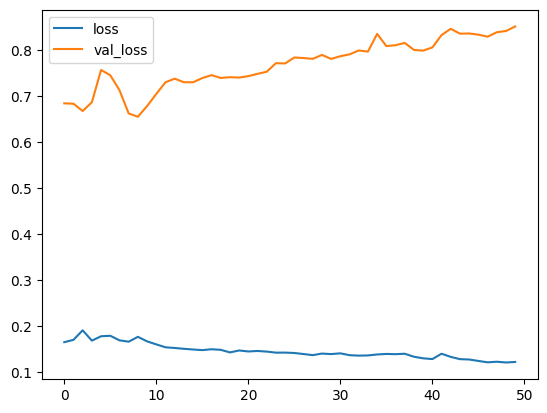

In [38]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

# It did go better than i expected by simply dropping unneccesary classes, and scaling data. Now will try to do it just with scikit-learn library. Because this is the way.

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np



params = {'max_depth': np.arange(2, 10),
          'criterion': ['gini', 'entropy'],
          'max_features': np.arange(2, 5),
          'min_samples_split': np.arange(3, 8)}

clf_rdy = GridSearchCV(DecisionTreeClassifier(random_state = 72), params, cv = 5, scoring = "f1_weighted" )

clf_rdy.fit(X_train, y_train)
clf_rdy.score(X_test, y_test)
clf_rdy.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 4,
 'min_samples_split': 3}

In [43]:
optim_model = DecisionTreeClassifier(criterion ='entropy', max_depth = 4, max_features = 4, min_samples_split = 3)
optim_model.fit(X_train, y_train)
y_preds = optim_model.predict(X_test)

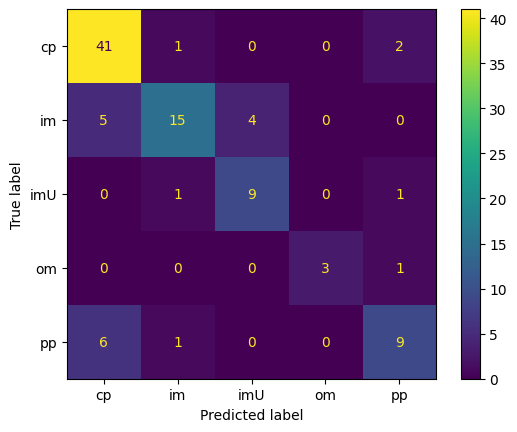

In [44]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, RocCurveDisplay
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_test, y_preds)
unique_classes = np.unique(df['site']).tolist()

conf = ConfusionMatrixDisplay(conf_matrix, display_labels = unique_classes)

conf.plot()




In [45]:
clf_rdy.score(X_test, y_test)

0.776831553230364